# 6.2 Exploring Relationships

## This script will contain the following:

#### 00. Importing Libraries and Data
#### 01. Identify variables suitable for exploratory analysis
#### 02. Creating a correlation matrix heatmap
#### 03. Create scatterplot(s) for variables with the strongest correlations
#### 04. Create a pair plot of the entire data set
#### 05. Create a categorical plot and interpret the results
#### 06. Asnwering questions
#### 07. Define any hypotheses that you can at this point.


### 00. Importing Data and Libraries

In [74]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [75]:
# Check the version of matplotlib to avoid any problems with heatmaps

matplotlib.__version__

'3.7.1'

In [76]:
# Version is past 3.1.1, so we're good!
## This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [77]:
# Create a folder path
path = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0\02 Data'

In [78]:
# Import cleaned data from previous exercise as 'df'
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'baseball_merged.csv'), index_col = False)

In [79]:
# Check data import
df.head()

,rank,combined_key,name,year,city,state,country,bats,throws,team_signed,...,contract_start,contract_end,contract_length,total_salary,age,team_played,league,games,war,actual_salary
0,1,"Mike Trout, 2019",Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,2019,2030,12,426500000,27,LAA,AL,134,7.9,17666667.0
1,1,"Mike Trout, 2020",Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,2019,2030,12,426500000,28,LAA,AL,53,1.8,37666666.0
2,1,"Mike Trout, 2021",Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,2019,2030,12,426500000,29,LAA,AL,36,1.8,37116667.0
3,1,"Mike Trout, 2022",Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,2019,2030,12,426500000,30,LAA,AL,119,6.3,37116666.0
4,1,"Mike Trout, 2023",Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,2019,2030,12,426500000,31,LAA,AL,81,3.0,37116667.0


Import looks good!

### 01. Identify variables suitable for exploratory analysis


In [80]:
# Get column names

df.columns

Index(['rank', 'combined_key', 'name', 'year', 'city', 'state', 'country',
       'bats', 'throws', 'team_signed', 'team_locale', 'position',
       'contract_start', 'contract_end', 'contract_length', 'total_salary',
       'age', 'team_played', 'league', 'games', 'war', 'actual_salary'],
      dtype='object')

In [81]:
# Create a subset with variables suitable for exploratory analysis
# Exclude 'combined_key' to start with
df_2 = df[['rank', 'name', 'year', 'city', 'state', 'country',
       'bats', 'throws', 'team_signed', 'team_locale', 'position',
       'contract_start', 'contract_end', 'contract_length', 'total_salary',
       'age', 'team_played', 'league', 'games', 'war', 'actual_salary']]

In [82]:
df_2.head()

,rank,name,year,city,state,country,bats,throws,team_signed,team_locale,...,contract_start,contract_end,contract_length,total_salary,age,team_played,league,games,war,actual_salary
0,1,Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,"Anaheim, California",...,2019,2030,12,426500000,27,LAA,AL,134,7.9,17666667.0
1,1,Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,"Anaheim, California",...,2019,2030,12,426500000,28,LAA,AL,53,1.8,37666666.0
2,1,Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,"Anaheim, California",...,2019,2030,12,426500000,29,LAA,AL,36,1.8,37116667.0
3,1,Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,"Anaheim, California",...,2019,2030,12,426500000,30,LAA,AL,119,6.3,37116666.0
4,1,Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,"Anaheim, California",...,2019,2030,12,426500000,31,LAA,AL,81,3.0,37116667.0


In [83]:
#create a correlation matrix using pandas
df_2.corr()

ValueError: could not convert string to float: 'Mike Trout'

In [84]:
df_2.dtypes

rank                 int64
name                object
year                 int64
city                object
state               object
country             object
bats                object
throws              object
team_signed         object
team_locale         object
position            object
contract_start       int64
contract_end         int64
contract_length      int64
total_salary         int64
age                  int64
team_played         object
league              object
games                int64
war                float64
actual_salary      float64
dtype: object

It doesn't appear that a correlation matrix can be made use string variables. I'll have to exclude these columns from my correlation explorations.

The columns that will be excluded are: 

name

city

state

country

bats

throws

team_signed

team_locale

position

team_played

league


In [85]:
df_3 = df_2[['rank', 'year', 'contract_start', 'contract_end', 'contract_length', 'total_salary', 'age', 'games', 'war', 'actual_salary']]

In [86]:
#create a correlation matrix using pandas
df_3.corr()

,rank,year,contract_start,contract_end,contract_length,total_salary,age,games,war,actual_salary
rank,1.000000,-0.219657,-0.154621,-0.340631,-0.690270,-0.838900,0.009302,-0.024883,-0.104899,-0.580590
year,-0.219657,1.000000,0.953250,0.938934,0.007979,0.247901,-0.003773,-0.234025,-0.317811,0.341262
contract_start,-0.154621,0.953250,1.000000,0.956851,-0.077902,0.193710,-0.154187,-0.212290,-0.248952,0.266903
contract_end,-0.340631,0.938934,0.956851,1.000000,0.194310,0.405075,-0.208169,-0.137580,-0.193179,0.306515
contract_length,-0.690270,0.007979,-0.077902,0.194310,1.000000,0.795955,-0.193091,0.218841,0.167426,0.204997
total_salary,-0.838900,0.247901,0.193710,0.405075,0.795955,1.000000,-0.048163,0.031024,0.126186,0.592860
age,0.009302,-0.003773,-0.154187,-0.208169,-0.193091,-0.048163,1.000000,-0.179657,-0.291922,0.283804
games,-0.024883,-0.234025,-0.212290,-0.137580,0.218841,0.031024,-0.179657,1.000000,0.357960,-0.192879
war,-0.104899,-0.317811,-0.248952,-0.193179,0.167426,0.126186,-0.291922,0.357960,1.000000,-0.058878
actual_salary,-0.580590,0.341262,0.266903,0.306515,0.204997,0.592860,0.283804,-0.192879,-0.058878,1.000000


### 02. Creating a correlation matrix heatmap

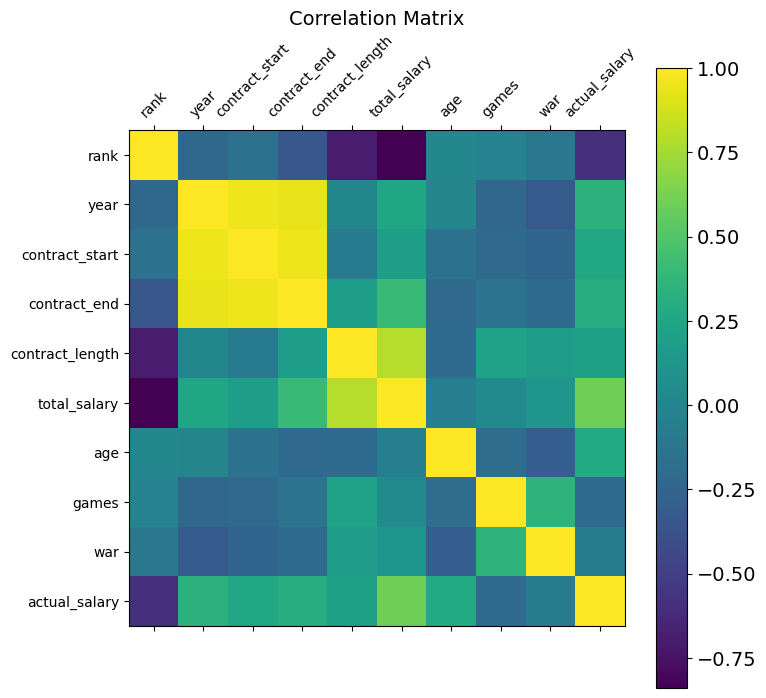

In [87]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_3.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_3.shape[1]), df_3.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_3.shape[1]), df_3.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig("corr_hm_02.png") 

It looks like the 'contract_start' and 'contract_end' columns can be removed from analysis

In [88]:
# Create a new subset excluding 'contract_start' and 'contract_end'
df_4 = df_3[['rank', 'year', 'contract_length', 'total_salary', 'age', 'games', 'war', 'actual_salary']]

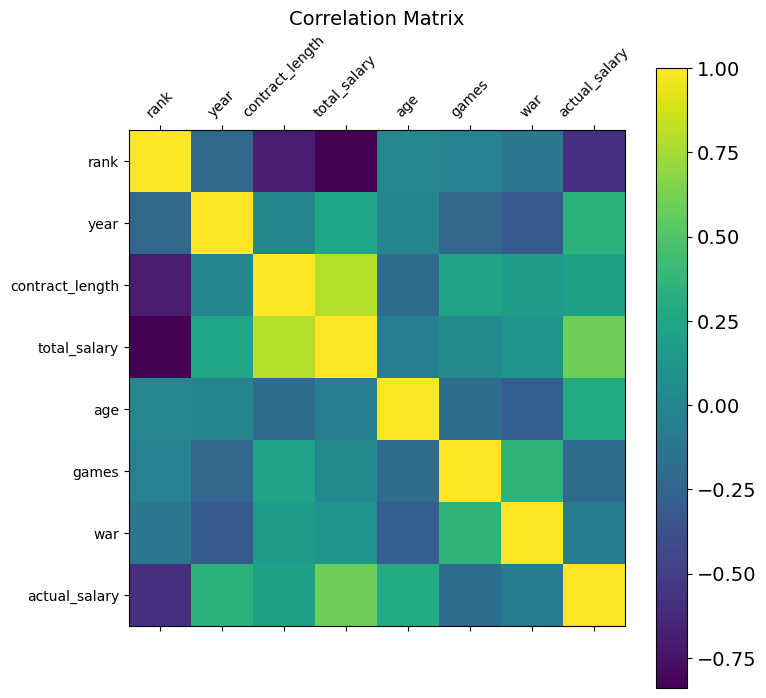

In [89]:
# Add labels, a legend, and change the size of the heatmap using new subset

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_4.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_4.shape[1]), df_4.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_4.shape[1]), df_4.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig("corr_hm_03.png") 

I've practiced making a correlation heatmap with matplotlib, now I'll make one with seaborn (a prettier one)

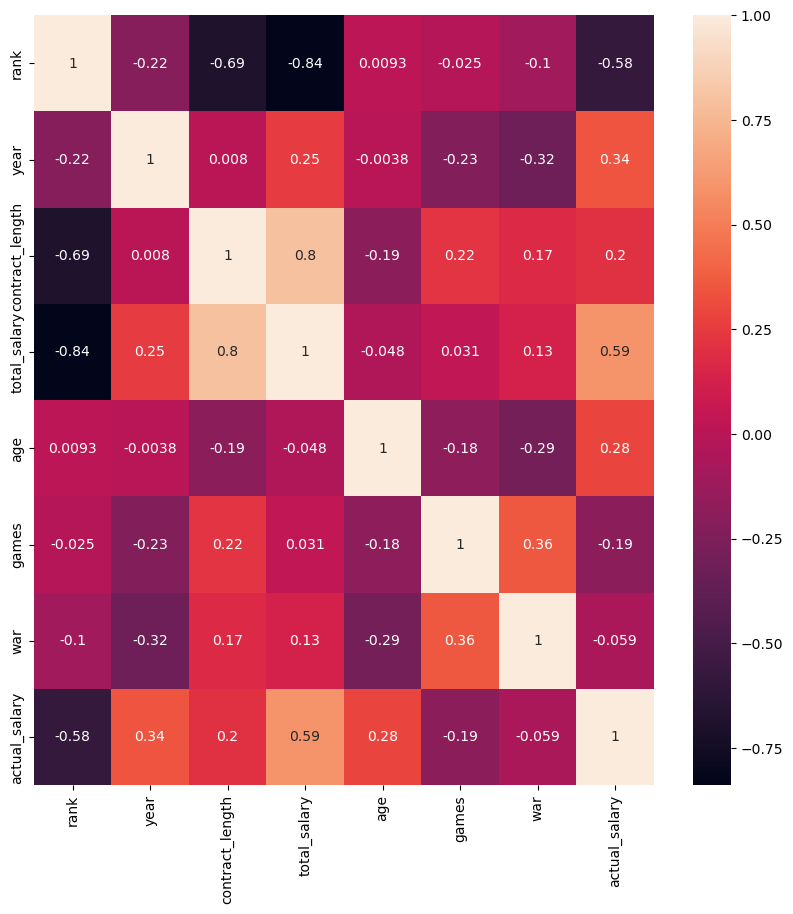

In [90]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_4.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

plt.savefig("corr_hm_04.png")

#### Correlation matrix explained
##### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

Here is one example of each type of relationship:

##### Positive Relationships
* 0: no relationship (red)
     * none
* 0.1–0.3: weak relationship (dark orange)
    * contract_length and war
* 0.3–0.5: moderate relationship (middle orange)
    * actual_salary and year
* 0.5–1.0: strong relationship (light orange)
    * contract length and total_salary

##### Negative Relationships
* 0: no relationship (red)
    * none
* -0.1 – -0.3: weak relationship (light purple)
    * war and rank
* -0.3 – -0.5: moderate relationship (dark purple)
    * age and total_salary
* -0.5 – -1.0: strong relationship (black)
    * rank and contract_length

All variables compared to themselves have a perfect correlation (value of 1.0, cream color) and I will not consider these in analysis.

### 03. Create scatterplot(s) for variables with the strongest correlations

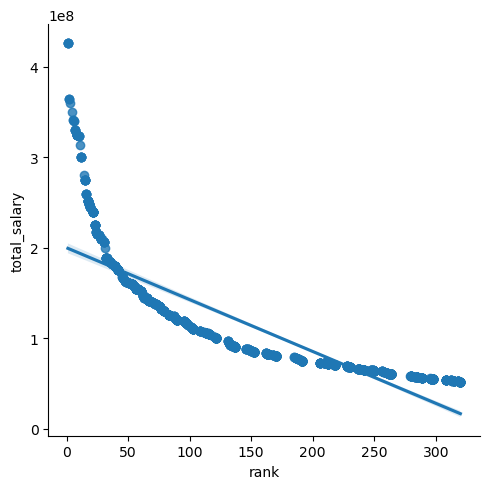

In [91]:
# Scatterplot for 'rank' and 'total_salary' using seaborn

sns.lmplot(x = 'rank', y = 'total_salary', data = df_4)

##### Observations: total_salary and rank (r= -0.84)
As rank increases, total_salary decreases. This is an example of a negative relationship. This trend appears to be exponential, indicating that the drop off between total_salaries is great. There appears to be an outlier value for total_salary, I suspect this is Mike Trout's contract with the LAA.

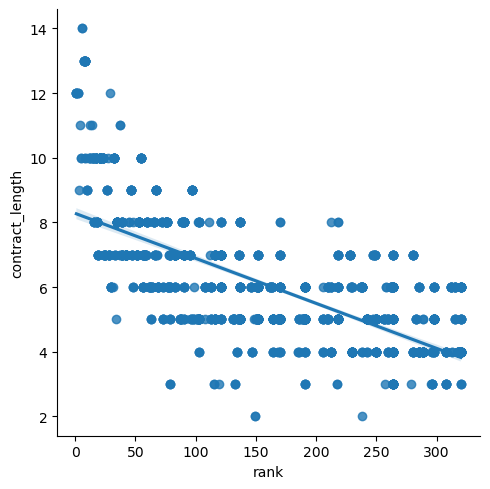

In [92]:
# Scatterplot for 'rank' and 'contract_length' using seaborn

sns.lmplot(x = 'rank', y = 'contract_length', data = df_4)

##### Observations: contract_length and rank (r= -0.69)
As rank increases, contract_length decreases. This is a negative relationship. While this trend is less defined than the previous scatterplot for rank and total salary, I can still see a negative trend.

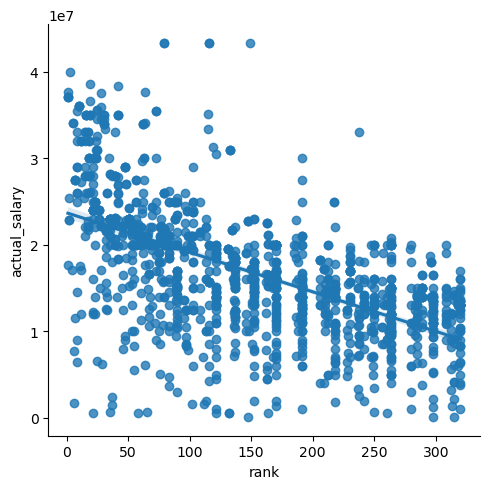

In [93]:
# Scatterplot for 'rank' and 'actual salary' using seaborn

sns.lmplot(x = 'rank', y = 'actual_salary', data = df_4)

##### Observations: rank and actual_salary (r= - 0.58)
As rank increases, actual_salary decreases. This is a negative relationship. This data has a great spread from the line of fit and many more outliers than the other scatterplots so far.

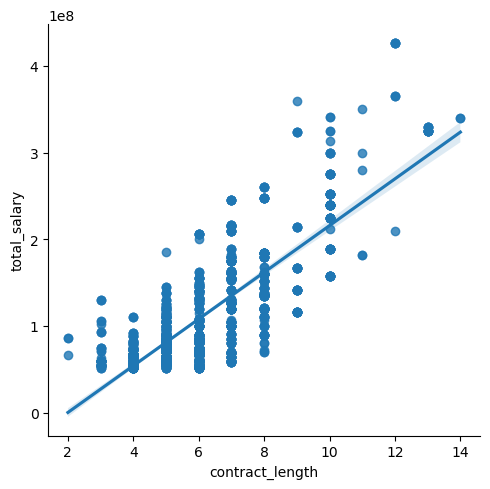

In [94]:
# Scatterplot for 'total_salary' and 'contract_length' using seaborn

sns.lmplot(x = 'contract_length', y = 'total_salary', data = df_4)

##### Observations: total_salary and contract_length (r= 0.79)
As contract_length increases, total_salary increases. This is a positive relationship.

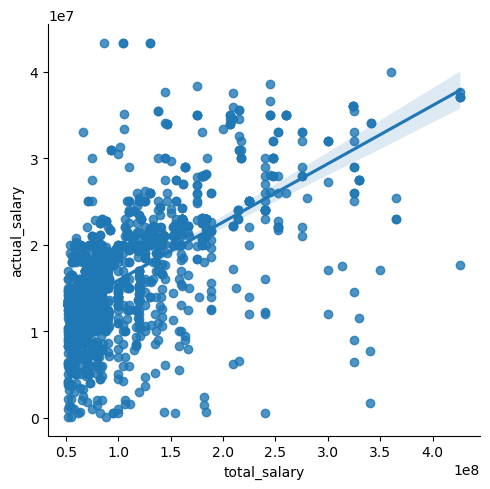

In [96]:
# Scatterplot for 'total_salary' and 'actual_salary' using seaborn

sns.lmplot(x = 'total_salary', y = 'actual_salary', data = df_4)

##### Observations: total_salary and actual_salary (r= 0.59)
As total_salary increases, actual_salary increases too; this is a positive relationship. This means that a player is actually making the money they were promised in their contract. Actual_salary represents what a player earns each year, so I would hope that there is a positive relationships between these two variables.

### 04. Create a pair plot of the entire data set

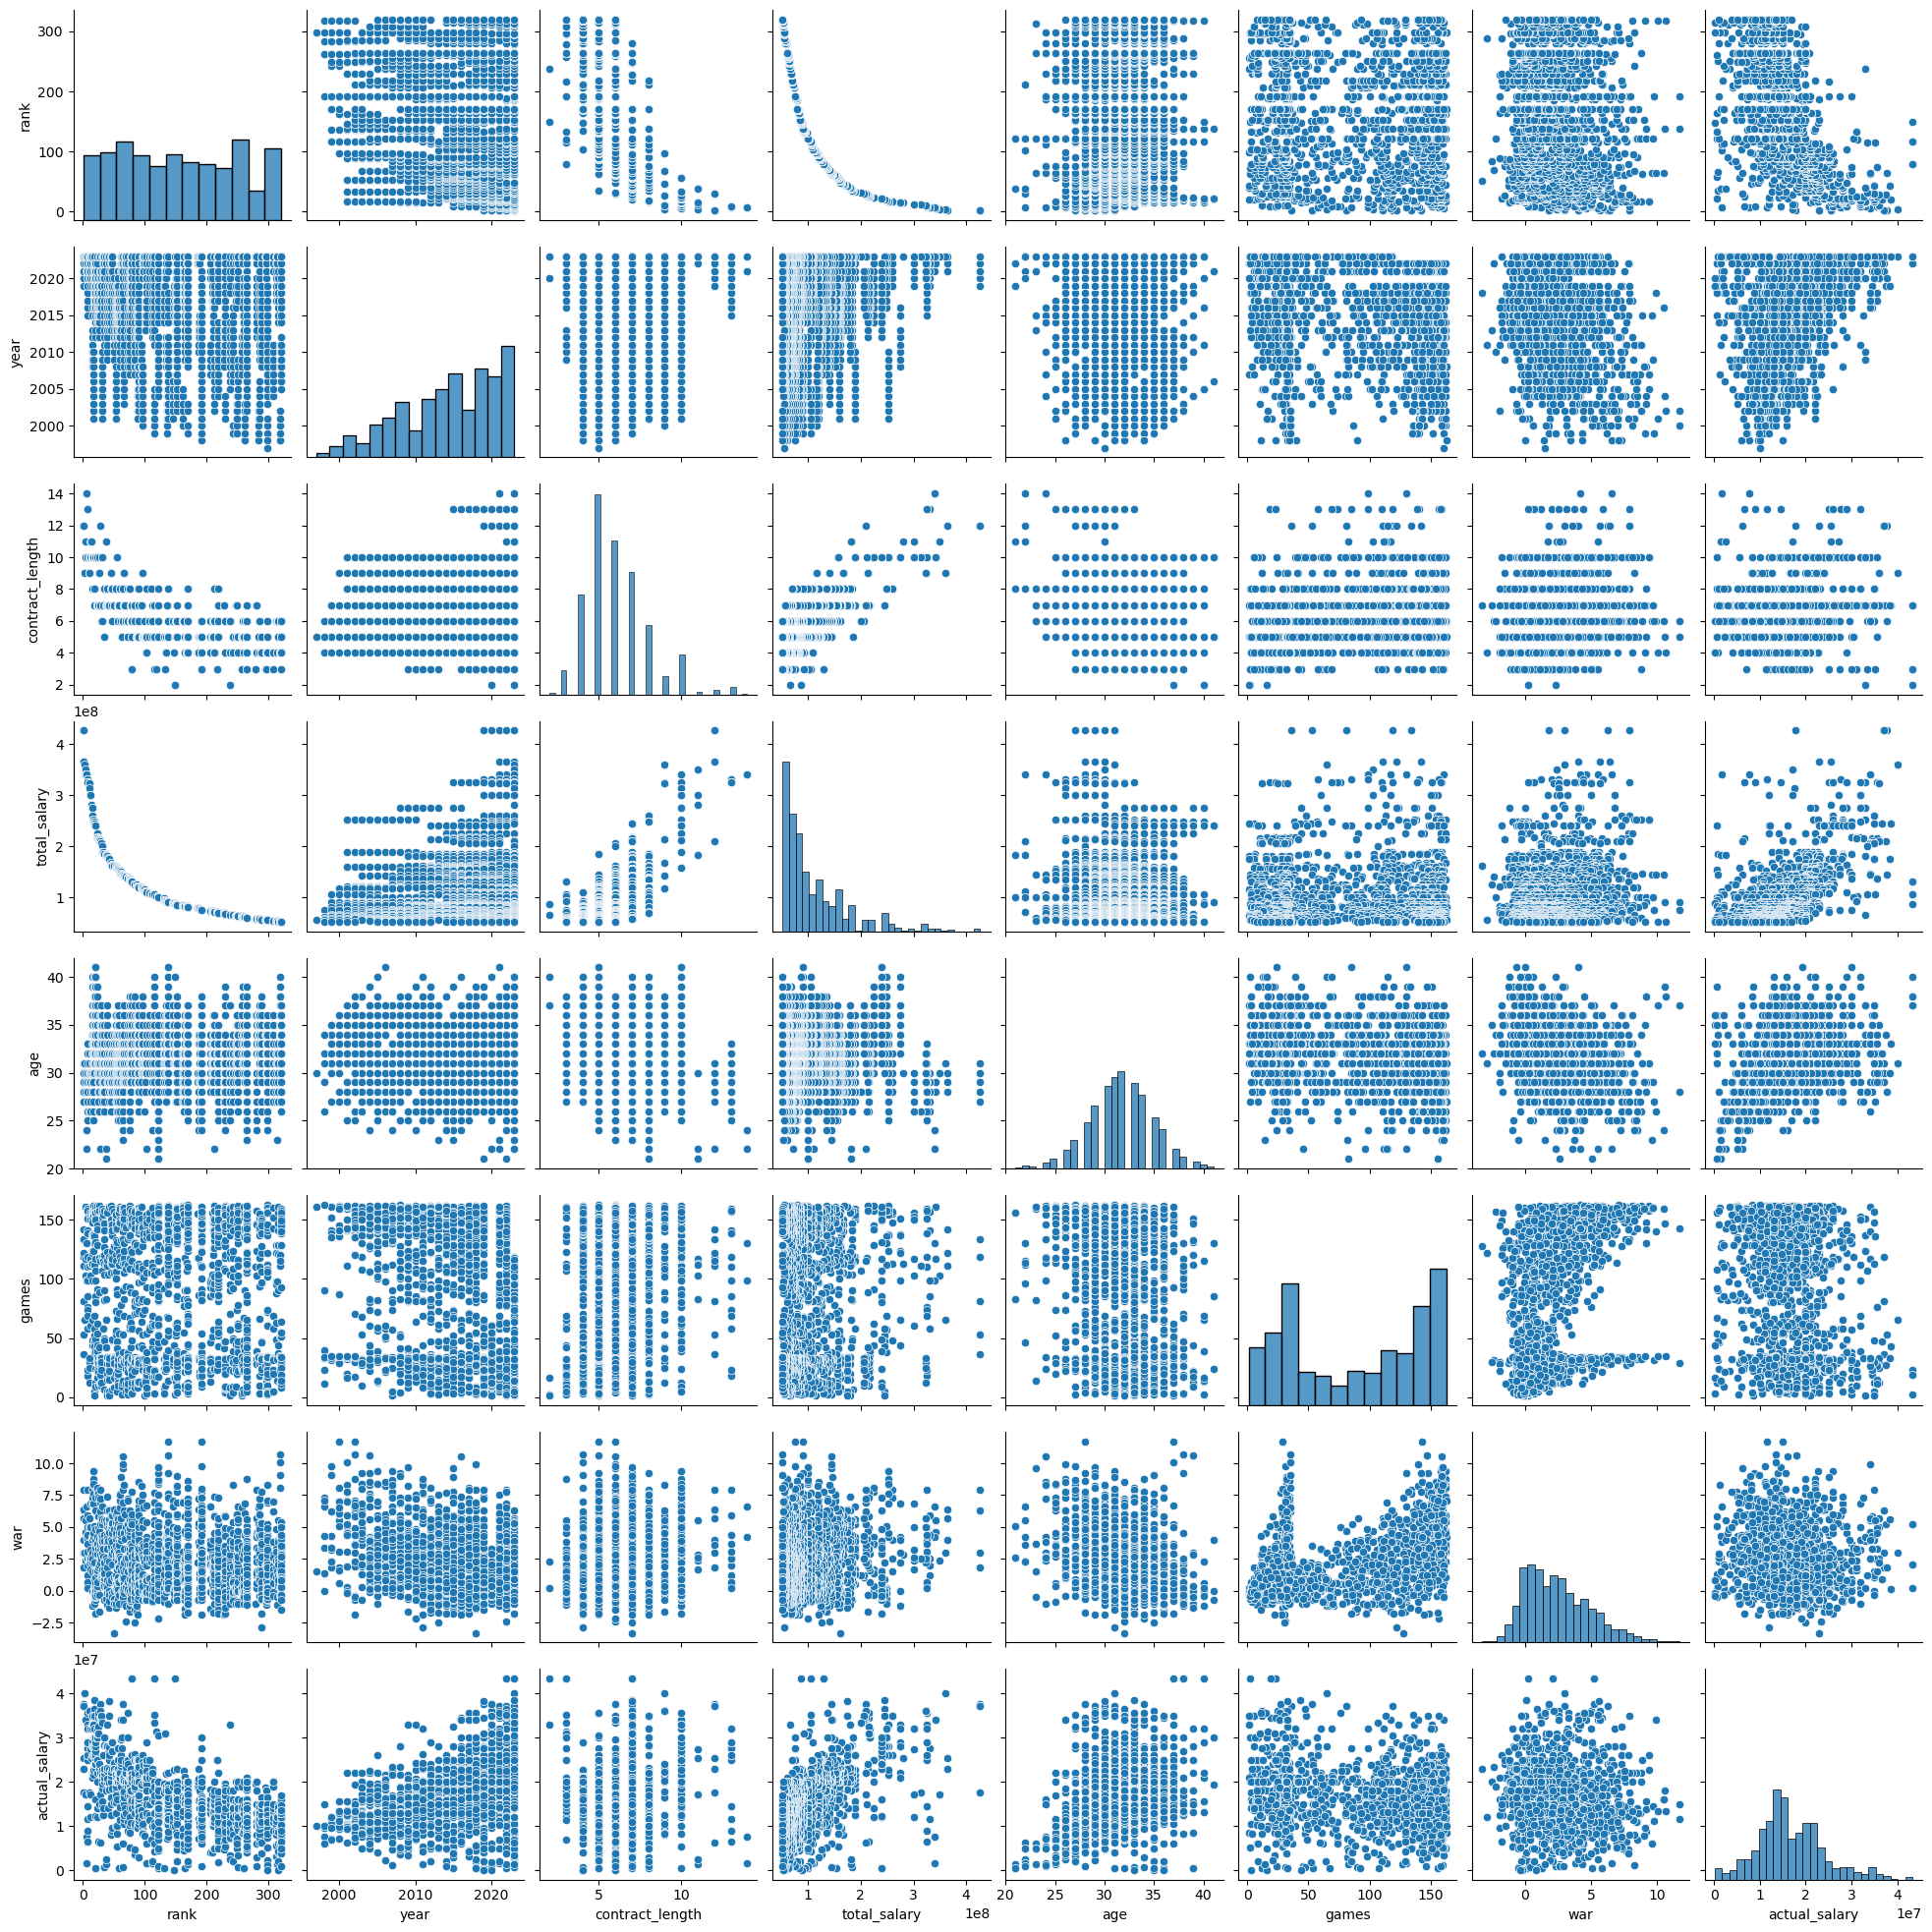

In [98]:
# Create a pair plot of the entire data set

g = sns.pairplot(df_4)
plt.savefig("pair_plot_01.png")

##### Observations:
I definitely want to explore the war variable furhter, upon first glance there doesn't seem to be a strong correlation or trend when it's compared to any variable. And it's distribution when compared to other variables is also very spread out. If war is meant to assess player value, I would expect there to be some kind of correaltion when compared to variables such as rank, salary, contract length...

Honestly, I was expected stronger relationships between variables, so I'd like to explore them all more.

For these correlation explorations, I've only examined float or int type variables though, so perhaps there will be more insight to draw from the string type variables.

### 05. Create a categorical plot and interpret the results
#### categorical plot 1

<Axes: xlabel='total_salary', ylabel='Count'>

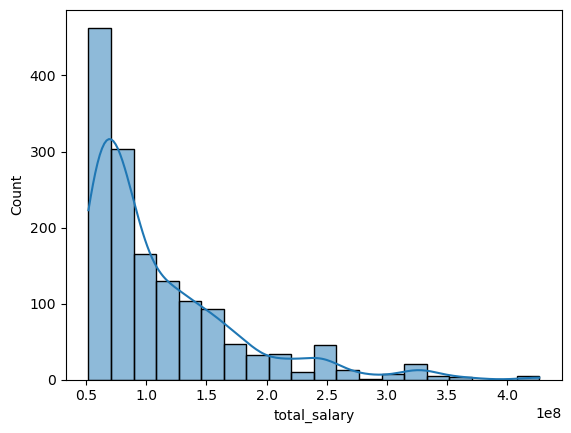

In [99]:
# 'total_salary' will be my categorical variable
# 'contract_length' will be my independent variable, x-axis
# 'war' will be my dependent variable, y-axis

#First I'll make a histogram of the values for 'total_salary'
sns.histplot(df_4['total_salary'], bins = 20, kde = True)

In [108]:
# Time to make a new variable 'total_salary_category'
df_4.loc[df_4['total_salary'] < 75000000, 'total_salary_category'] = 'lower salary'
df_4.loc[(df_4['total_salary'] >= 75000000) & (df_4['total_salary'] < 200000000), 'total_salary_category'] = 'middle salary'
df_4.loc[df_4['total_salary'] >= 200000000, 'total_salary_category'] = 'high salary'

In [109]:
df_4['total_salary_category'].value_counts(dropna = False)

total_salary_category
middle salary    826
lower salary     509
high salary      146
Name: count, dtype: int64

In [112]:
df_4.columns

Index(['rank', 'year', 'contract_length', 'total_salary', 'age', 'games',
       'war', 'actual_salary', 'total_salary_category'],
      dtype='object')

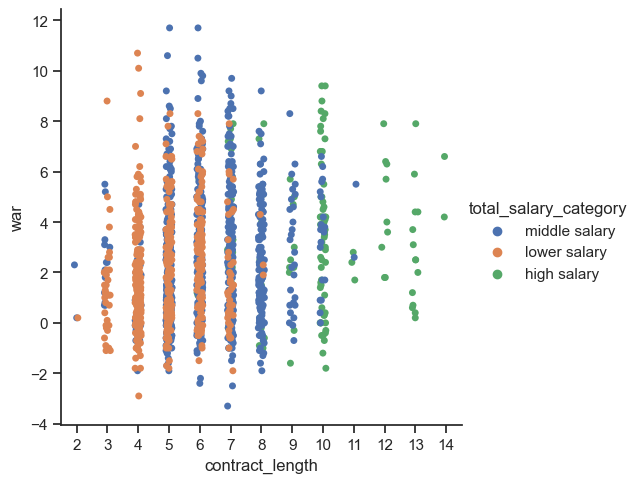

In [117]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='contract_length', y='war', hue='total_salary_category', data=df_4)
plt.savefig("cat_plot_01.png")

##### Observations:
Here I can see that players with higher salaries, those over $200 million USD, typically have contracts nine years or more. A high war value doesn't ensure a high contract length or salary. In fact it appears that most player have a war value between -2 and 8 regardledd of contract length or salary. 

I'm going to make another categorical plot and explore some different values.

#### categorical plot 2

<Axes: xlabel='war', ylabel='Count'>

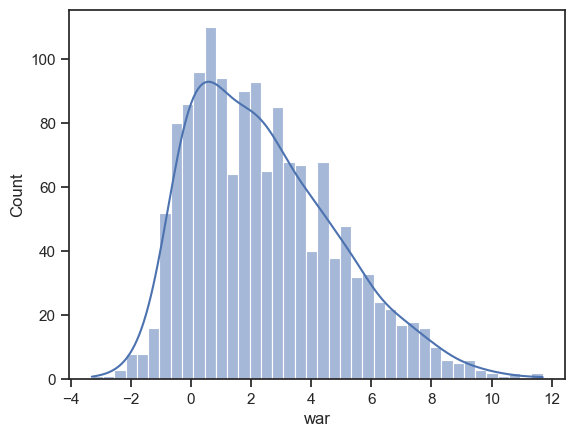

In [119]:
# 'war' will be my categorical variable
# 'contract_length' will be my independent variable, x-axis
# 'total_salary' will be my dependent variable, y-axis

#First I'll make a histogram of the values for 'war'
sns.histplot(df_4['war'], bins = 40, kde = True)

In [132]:
# Time to make a new variable 'war_category'
df_4.loc[df_4['war'] < 1, 'war_category'] = 'low war'
df_4.loc[(df_4['war'] >= 1) & (df_4['war'] < 46), 'war_category'] = 'middle war'
df_4.loc[df_4['war'] >= 6, 'war_category'] = 'high war'

In [133]:
df_4['war_category'].value_counts(dropna = False)

war_category
middle war    851
low war       489
high war      140
NaN             1
Name: count, dtype: int64

I know this NaN value is because there is one player missing a war value. No action taken

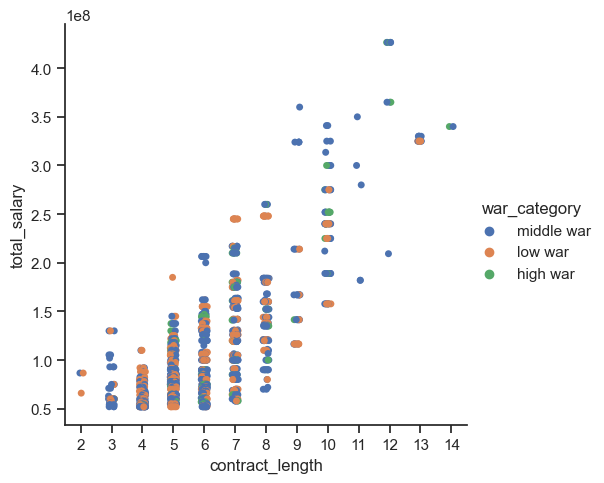

In [134]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='contract_length', y='total_salary', hue='war_category', data=df_4)
plt.savefig("cat_plot_02.png")

##### Observations:
Here it appears that players with higher war values (greater than or equal to 6) have contracts longer than five years and salaries over 150 million USD. Most players have a salary under 200 million USD and contract lengths under nine years. Thsese players either have middle or low war values (less than 6). There appears to be a handful of player with salaries over 200 million USD with low war values (less than 1). This is interesting as it would indicate that they are in a high paying contract with little contribution to the standings of the team they play for.

### 06. Answering questions

__Previous Questions__
* Is there a difference in WAR between players in the American League or the National League?
* Do pitchers or position players have a greater WAR value? Is there any discernable difference between these players at all? If there is, explore this topic. (Do pitchers, infielders, outfielders, designated hitters have greater WAR?)
* Does player age affect WAR? Or, does a player’s WAR value change as they get older?
* Does a larger (fiscal) contract correlate to a greater WAR value?
* Is there a tendency for certain teams to have players with greater WAR value? If so, which ones and what are possible explanations for this?
* Does player injury influence WAR? Are there any players who seem to be more prone to injury?
* Is there any correlation between WAR and laterality? (If a player is righ-handed, left-handed, etc.)
* Is there any connection between WAR and country of origin?

Unfortuantely, all but a few of my questions were based on categorical data. So I have new questions!

__Old Answerable Questions__
* Does player age affect WAR? Or, does a player’s WAR value change as they get older?
    * There is a weak, negative relationship between WAR and age. As age increaes, war decreases. Since the relationship has a r value of -0.29, I can't say with confidence that there is a strong correlation between these two variables.
* Does a larger (fiscal) contract correlate to a greater WAR value?
    * No, there is a weak, positive realtionship between WAR and total_salary (r= 0.13). And in fact, there is a weak, NEGATIVE relationship between WAR and actual_salary (r= -0.059.). This does surprise me. 

__New Questions__
* What, if any, is the relationship between WAR and games played?
* What, if any, is the relationship between year and total_salary? What are some possible explanations?
* What defines an acceptable WAR value? (I need to create some sort of barromater or metric that can actually quantify what this statistic means)

### 07. Hypotheses?

I really don't feel that I can make any hypotheses at this time...